In [2]:
"""
    Código python para hacer un Exploratory Data Analysis que nos permita entender la información obtenida
    con el objetivo de proponer una estrategia para clasificar los sellers que representen importancia para
    la línea de negocio. Para usar este código es importante primero haber obtenido los datos de la API
    mediante el file challenge_getData.ipynb
"""
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler

df_items = pd.read_csv('dataset.csv')
df_categories = pd.read_csv('categories.csv')




In [49]:
df_item_categories = pd.merge(df_categories.rename(columns={'id': 'categoria_id','name': 'category_name'}),df_items,how='inner',left_on='categoria_id', right_on='original_category')

In [4]:
df_item_categories

,categoria_id,category_name,id,title,condition,permalink,accepts_mercadopago,listing_type_id,site_id,original_category,...,original_price,installments_quantity,installments_amount,installments_rate,seller_id,seller_nickname,official_store_id,official_store_name,available_quantity,use_thumbnail_id
0,MLA5725,Accesorios para Vehículos,MLA1583153780,Microfibra 40x80 Cm Autos Detailing Secado Rap...,new,https://www.mercadolibre.com.ar/microfibra-40x...,True,gold_special,MLA,MLA5725,...,NaN,NaN,NaN,NaN,290403581,LS PALERMO,NaN,NaN,500,True
1,MLA5725,Accesorios para Vehículos,MLA1277641650,Pack 4 Paños Microfibra Multiuso Limpieza Auto...,new,https://www.mercadolibre.com.ar/pack-4-panos-m...,True,gold_special,MLA,MLA5725,...,NaN,NaN,NaN,NaN,702150429,GLOBALNAVET,NaN,NaN,150,True
2,MLA5725,Accesorios para Vehículos,MLA1378229931,Casco Moto Vertigo V50 Dark Edicion Especial. ...,new,https://articulo.mercadolibre.com.ar/MLA-13782...,True,gold_special,MLA,MLA5725,...,98535.00,6.0,13935.98,12.74,263770607,GRAVEDADX,NaN,NaN,50,False
3,MLA5725,Accesorios para Vehículos,MLA851109741,Carcasa Llave Navaja Peugeot 2 Bot 307 308 C/...,new,https://articulo.mercadolibre.com.ar/MLA-85110...,True,gold_special,MLA,MLA5725,...,8255.74,6.0,1670.05,34.86,435859328,KEYFAD,3272.0,Keyfad,50,True
4,MLA5725,Accesorios para Vehículos,MLA1148567142,Bateria Alpina 12n5-3b Gel Zanella Zb 110 125 ...,new,https://articulo.mercadolibre.com.ar/MLA-11485...,True,gold_special,MLA,MLA5725,...,33228.00,6.0,4506.41,12.74,685241555,ALPINA ARG,2541.0,Alpina,250,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33033,MLA1953,Otras categorías,MLA1439582821,Sahumerios Bangladesh Simple Empaste X100 Unid...,new,https://www.mercadolibre.com.ar/sahumerios-ban...,True,gold_special,MLA,MLA1953,...,NaN,NaN,NaN,NaN,191914203,G.UTOPIA,54275.0,Grupo Utopia,150,True
33034,MLA1953,Otras categorías,MLA1389640875,Raw Armador De Conos Automatico Six Shooter 6 ...,new,https://www.mercadolibre.com.ar/raw-armador-de...,True,gold_special,MLA,MLA1953,...,NaN,6.0,10451.65,34.86,251681571,PLANTOLUEGOEXISTOGROWSHOP,54445.0,Planto Luego Existo,1,True
33035,MLA1953,Otras categorías,MLA1457772836,Sahumerios Sagrada Madre Artesano Natural Inci...,new,https://www.mercadolibre.com.ar/sahumerios-sag...,True,gold_special,MLA,MLA1953,...,NaN,6.0,1231.72,34.86,191914203,G.UTOPIA,54275.0,Grupo Utopia,1,True
33036,MLA1953,Otras categorías,MLA1705231190,Pastilla Sagrada Madre 7 Dias De Limpieza Frag...,new,https://www.mercadolibre.com.ar/pastilla-sagra...,True,gold_special,MLA,MLA1953,...,NaN,NaN,NaN,NaN,789683079,ORIENTE_MISTICO,NaN,NaN,1,True


In [5]:
#hacemos un analisis de los quantity installments que hay
installment_quantity_df = df_item_categories.groupby(['installments_quantity'])['id'].count()

installment_quantity_df = installment_quantity_df.reset_index()
installment_quantity_df.columns = ['installments_quantity', 'product_count']

#En caso de querer analizarlo en excel podemos exportarlo
#installment_quantity_df.to_csv('porductos_por_categoria_sellerID_listingType.csv', encoding='utf-8', index=False)

# Mostramos el resultado
print(installment_quantity_df)

   installments_quantity  product_count
0                    1.0             41
1                    3.0            925
2                    6.0          25540
3                    9.0            426
4                   12.0            600
5                   18.0             39


In [31]:
#Vamos a calcular un score para installments quantity donde el seller que de 18 meses tendrá una calificación de 1 y los demás
#se basarán en el cálculo del score
min_installments = installment_quantity_df['installments_quantity'].min()
max_installments = installment_quantity_df['installments_quantity'].max()

#Calculamos el score
installment_quantity_df['score'] = (installment_quantity_df['installments_quantity'] - min_installments) / (max_installments - min_installments)

installment_quantity_df['score'] = np.floor(installment_quantity_df['score'] * 10) / 10

# Mostrar el resultado
installment_quantity_df

,installments_quantity,product_count,score
0,1.0,41,0.0
1,3.0,925,0.1
2,6.0,25540,0.2
3,9.0,426,0.4
4,12.0,600,0.6
5,18.0,39,1.0


In [32]:
#hacemos un analisis de los installments rates que hay
installment_rate_df = df_item_categories.groupby(['installments_rate'])['id'].count()

installment_rate_df = installment_rate_df.reset_index()
installment_rate_df.columns = ['installments_rate', 'product_count']

#En caso de querer analizarlo en excel podemos exportarlo
#installment_rate_df.to_csv('porductos_por_categoria_sellerID_listingType.csv', encoding='utf-8', index=False)

# Mostramos el resultado
installment_rate_df

,installments_rate,product_count
0,0.00,3652
1,11.41,1305
2,12.74,866
3,34.86,21748


In [33]:
#Vamos a calcular un score para installments quantity donde el seller que de 18 meses tendrá una calificación de 1 y los demás
#se basarán en el cálculo del score
min_installments_rate = installment_rate_df['installments_rate'].min()
max_installments_rate = installment_rate_df['installments_rate'].max()

#Calculamos el score
installment_rate_df['score'] = (max_installments_rate - installment_rate_df['installments_rate']) / (max_installments_rate - min_installments_rate)

installment_rate_df['score'] = np.floor(installment_rate_df['score'] * 10) / 10

# Mostrar el resultado
installment_rate_df

,installments_rate,product_count,score
0,0.00,3652,1.0
1,11.41,1305,0.6
2,12.74,866,0.6
3,34.86,21748,0.0


In [34]:
# Agrupar por seller_id y contar categorías únicas
sellers_most_categories = df_item_categories.groupby('seller_id')['category_name'].nunique().reset_index(name='category_count')

# Ordenar de mayor a menor cantidad de categorías
sellers_most_categories = sellers_most_categories.sort_values(by='category_count', ascending=False)
sellers_most_categories

,seller_id,category_count
847,37133205,24
345,13647702,20
890,39144101,20
4067,188316739,18
56,1176849,15
...,...,...
8534,2109015579,1
8535,2111316385,1
8536,2111827077,1
8537,2115481041,1


In [35]:
#Vamos a calcular un score para la cantidad de productos que un seller tiene en categorías distintas, si un seller tiene diversidad
#tiene más probabilidad de que le compren productos
min_sellers_most_categories = sellers_most_categories['category_count'].min()
max_sellers_most_categories = sellers_most_categories['category_count'].max()

#Calculamos el score
sellers_most_categories['score'] = (sellers_most_categories['category_count'] - min_sellers_most_categories) / (max_sellers_most_categories - min_sellers_most_categories)

sellers_most_categories['score'] = np.floor(sellers_most_categories['score'] * 10) / 10

# Mostrar el resultado
sellers_most_categories

,seller_id,category_count,score
847,37133205,24,1.0
345,13647702,20,0.8
890,39144101,20,0.8
4067,188316739,18,0.7
56,1176849,15,0.6
...,...,...,...
8534,2109015579,1,0.0
8535,2111316385,1,0.0
8536,2111827077,1,0.0
8537,2115481041,1,0.0


In [36]:
#hacemos un analisis de los listing type que hay. vamos a dejar fuera a inmuebles y servicios
filter_listing_type_df = df_item_categories[~df_item_categories['category_name'].isin(['Inmuebles','Servicios'])]
filter_listing_type_df = df_item_categories[df_item_categories['listing_type_id'].isin(['gold_pro'])]
listing_type_df = filter_listing_type_df.groupby(['seller_id'])['id'].count()

listing_type_df = listing_type_df.reset_index()
listing_type_df.columns = ['seller_id', 'product_count']

#Como los valores son demasiados para asignar un score por seller, vamos a agruparlos en bins con etiquetas que indiquen
#si el seller tiene casi ningún producto en gold_pro, pocos, aceptables o muchos
# un seller con muchos productos en gold_pro puede ser más atractivo 
listing_type_df['value_bins'] = pd.cut(listing_type_df['product_count'], bins=[0, 20, 40, 100, 200],  labels=['Casi Nada', 'Pocos', 'Aceptable', 'Muchos'])

#Asignamos pesos manualmente debido a que sólo son 4 grupos
manual_scores = {
    'Muchos': 1.0,
    'Aceptable': 0.7,
    'Pocos': 0.5,
    'Casi Nada': 0.0
}

listing_type_df['score'] = listing_type_df['value_bins'].map(manual_scores)
listing_type_df.drop('product_count', axis=1, inplace=True)
# Mostramos el resultado
listing_type_df
#listing_type_df.to_csv('scores_product_count.csv',index=False)

,seller_id,value_bins,score
0,79704,Casi Nada,0.0
1,111286,Casi Nada,0.0
2,111621,Casi Nada,0.0
3,112133,Casi Nada,0.0
4,135942,Casi Nada,0.0
...,...,...,...
1210,2073405247,Casi Nada,0.0
1211,2092994529,Casi Nada,0.0
1212,2121491235,Casi Nada,0.0
1213,2163881647,Casi Nada,0.0


In [19]:
#Para la disponibilidad de productos vamos a aplicar un algoritmo de clusterización para poder agrupar a los sellers por los que tienen más disponibilidad
df_filtered = df_item_categories[['seller_id', 'available_quantity', 'id']]
df_cleaned = df_filtered.dropna(subset=['seller_id', 'available_quantity', 'id'])
# Agrupar por seller_id y calcular métricas
df_grouped = df_cleaned.groupby('seller_id').agg({
    'available_quantity': 'sum',  # Total de disponibilidad por seller
    'id': 'count'  # Cantidad de productos
}).rename(columns={'id': 'product_count'}).reset_index()

# Escalar los datos para DBSCAN
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_grouped[['available_quantity', 'product_count']])


In [ ]:
#Vamos a utilizar un algortimo de densidad ya que hay sellers con cantidades muy altas de disponibilidad, las cuales nos pueden sesgar nuestro análisis.
#Con este algoritmo trabajamos los valores atípicos como una excepción y los dejamos fuera del score
from sklearn.cluster import DBSCAN

# Aplicar DBSCAN
dbscan = DBSCAN(eps=1, min_samples=5)  # Ajusta eps y min_samples según tus datos
df_grouped['cluster'] = dbscan.fit_predict(scaled_features)

# Revisar la distribución de clusters
print(df_grouped['cluster'].value_counts())


cluster
 0    8468
-1      38
 1      37
 3       7
 2       5
Name: count, dtype: int64


In [39]:
# Mapear clusters a etiquetas
cluster_mapping = {
    0: 'Casi Nada',
    1: 'Pocos',
    2: 'Aceptable',
    3: 'Muchos',
    -1: 'Ruido'
}
df_grouped['classification'] = df_grouped['cluster'].map(cluster_mapping)

#Asignamos pesos manualmente debido a que sólo son 4 grupos
manual_scores = {
    'Muchos': 1.0,
    'Aceptable': 0.7,
    'Pocos': 0.5,
    'Casi Nada': 0.0,
    'Ruido': 0.0
}

df_grouped['score'] = df_grouped['classification'].map(manual_scores)

df_available_qty = df_grouped[['seller_id', 'score']]

df_available_qty

,seller_id,score
0,62706,0.0
1,79704,0.0
2,100471,0.0
3,105065,0.0
4,107042,0.0
...,...,...
8550,2154714798,0.0
8551,2156213774,0.0
8552,2156912122,0.0
8553,2163881647,0.0


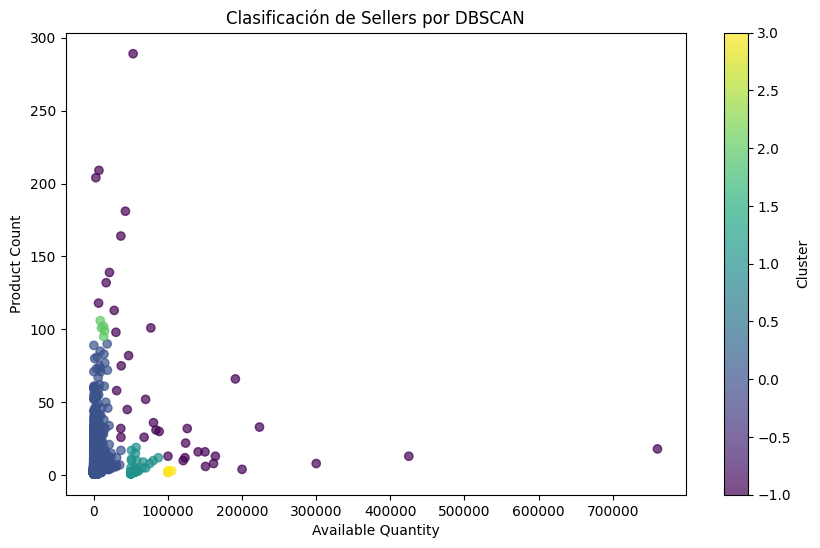

In [30]:
#Aquí podemos visualizar de mejor manera como es que fueron agrupados los valores para available_quantity
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df_grouped['available_quantity'], df_grouped['product_count'], c=df_grouped['cluster'], cmap='viridis', alpha=0.7)
plt.xlabel('Available Quantity')
plt.ylabel('Product Count')
plt.title('Clasificación de Sellers por DBSCAN')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
#Vamos a asignar los scores a los sellers en df_item_categories
df_available_qty
availabe_qty_dict = df_available_qty.set_index('seller_id')['score'].to_dict()

df_item_categories['score_available_qty'] = df_item_categories['seller_id'].map(availabe_qty_dict) 

df_item_categories['score_available_qty'].fillna(0, inplace=True)

installment_quantity_df
installments_qty_dict = installment_quantity_df.set_index('installments_quantity')['score'].to_dict()

df_item_categories['score_installments_qty'] = df_item_categories['installments_quantity'].map(installments_qty_dict)

df_item_categories['score_installments_qty'].fillna(0, inplace=True)

listing_type_df
listing_type_dict = listing_type_df.set_index('seller_id')['score'].to_dict()

df_item_categories['score_listing_type'] = df_item_categories['seller_id'].map(listing_type_dict)

df_item_categories['score_listing_type'].fillna(0, inplace=True)

sellers_most_categories
sellers_categories_dict = sellers_most_categories.set_index('seller_id')['score'].to_dict()

df_item_categories['score_sellers_categories'] = df_item_categories['seller_id'].map(sellers_categories_dict)

df_item_categories['score_sellers_categories'].fillna(0,inplace=True)

installment_rate_df
installment_rate_dict = installment_rate_df.set_index('installments_rate')['score'].to_dict()

df_item_categories['score_installment_rates'] = df_item_categories['installments_rate'].map(installment_rate_dict)

df_item_categories['score_installment_rates'].fillna(0, inplace=True)

#df_item_categories.to_csv('dataset_scores.csv', index=False)

C:\Users\em_ba\AppData\Local\Temp\ipykernel_35444\4174321792.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_item_categories['score_available_qty'].fillna(0, inplace=True)
C:\Users\em_ba\AppData\Local\Temp\ipykernel_35444\4174321792.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

In [55]:
df_item_categories['total_score'] = df_item_categories[['score_available_qty', 'score_installments_qty', 'score_listing_type', 'score_sellers_categories', 'score_installment_rates']].sum(axis=1).round(1)


In [56]:
df_item_categories.to_csv('dataset_scores.csv', index=False)